In [9]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets
from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn import cross_validation
from sklearn import metrics 
from pandas import DataFrame
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
NR_data = pd.read_csv("s1_pulse.txt", sep = " ", header = None )

In [11]:
NR_data.drop([55,56], axis = 1, inplace = True)

In [12]:
NR_data.columns=["event_id" if x == 0 else x for x in range(55)]
target_1 = [1 for x in range(78423)]
NR_data['target'] = target_1
name_1 = ["NR" for x in range(78423)]
NR_data['name'] = name_1

In [13]:
ER_data = pd.read_csv("s1_pulse_ER.txt", sep = " ", header = None )
ER_data.drop([55,56], axis = 1, inplace = True)
ER_data = ER_data[:78423]
ER_data.columns=["event_id" if x == 0 else x for x in range(55)]

In [14]:
target_0 = [0 for x in range(78423)]
ER_data['target'] = target_0
name_0 = ['ER' for x in range(78423)]
ER_data['name'] = name_0

In [15]:
frames = [NR_data, ER_data]
data = pd.concat(frames)

In [16]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(data.iloc[:, 2:55], data['target'], test_size = 0.3, random_state = 0)

In [17]:
from sklearn import preprocessing
normalized_train_data = preprocessing.normalize(train_data)
standardized_train_data = preprocessing.scale(normalized_train_data)
normalized_test_data = preprocessing.normalize(test_data)
standardized_test_data = preprocessing.scale(normalized_test_data)

In [18]:
model = GaussianNB()
model.fit(standardized_train_data, train_labels)

GaussianNB(priors=None)

In [19]:
predictions = model.predict(standardized_test_data)
metrics.accuracy_score(test_labels, predictions)

0.98971394567943216

([array([  2.46801547e+01,   0.00000000e+00,   3.18782675e-03,
           0.00000000e+00,   0.00000000e+00,   1.06260892e-03,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   1.06260892e-03,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   1.06260892e-03,
           1.06260892e-03,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   1.06260892e-03,
           1.06260892e-03,   0.00000000e+00,   1.06260892e-03,
           1.06260892e-03,   1.06260892e-03,   0.00000000e+00,
           2.12521783e-03,   0.00000000e+00,   1.062608

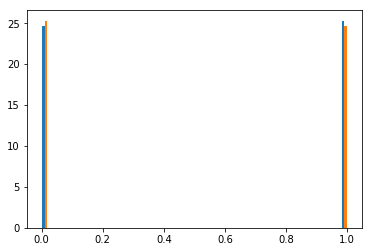

In [20]:
predicted_probabilities = model.predict_proba(standardized_test_data[:])
plt.hist(predicted_probabilities,bins=50, normed = True)

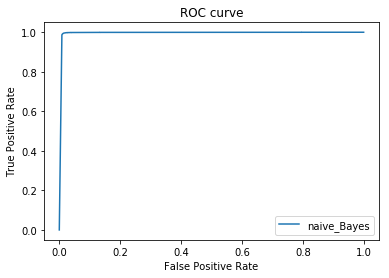

In [25]:
fpr, tpr, _ = metrics.roc_curve(test_labels, predicted_probabilities[:,1])
pylab.plot(fpr, tpr, label = 'naive_Bayes')
pylab.xlim([-0.05, 1.05])
pylab.ylim([-0.05, 1.05])
pylab.xlabel('False Positive Rate')
pylab.ylabel('True Positive Rate')
pylab.title('ROC curve')
pylab.legend(loc = "lower right")